In [44]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import resample

import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install pycrostates

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 3.2 MB/s eta 0:00:00a 0:00:01


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon
from pycrostates.io import ChData
from pycrostates.preprocessing import extract_gfp_peaks, resample

In [4]:
!pip install --upgrade seaborn
!pip install kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.9 MB/s eta 0:00:00:00:0100:01


In [46]:
# Define frequency bands
frequency_bands = {
    # 'delta': (0.5, 4),
    # 'theta': (4, 8),
    # 'alpha': (8, 13),
    'beta': (13, 30),
    # 'gamma': (30, 45)
}

for band_name, (l_freq, h_freq) in frequency_bands.items():
    print(f"{band_name} Band - Low freq = {l_freq} Hz and High freq =  {h_freq} Hz")

beta Band - Low freq = 13 Hz and High freq =  30 Hz


In [6]:
!pip install plotly

In [7]:
!pip install -U kaleido

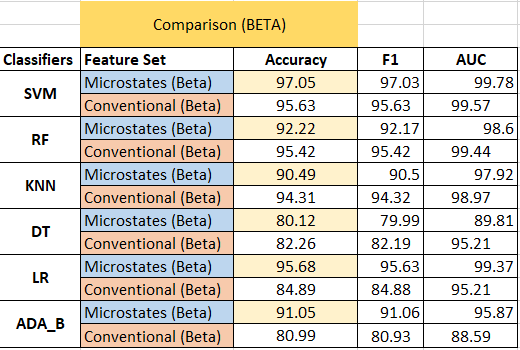

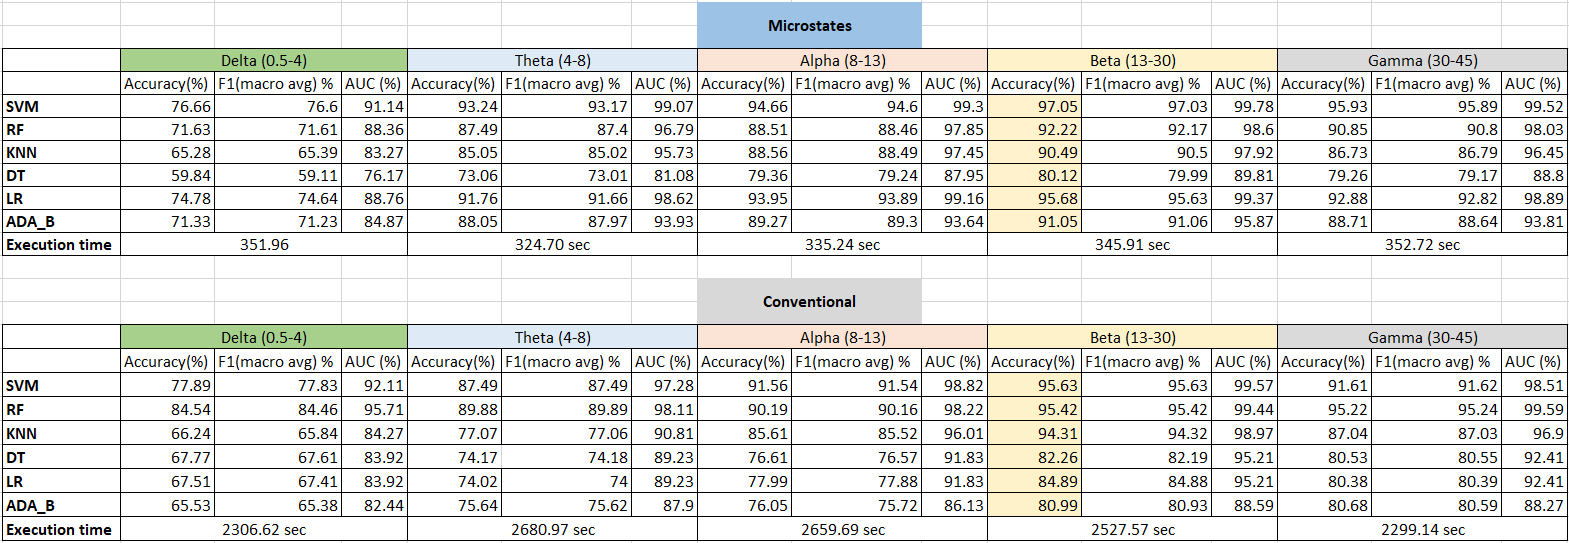

In [47]:
import pandas as pd

data = {
    "Classifiers": ["SVM", "SVM", "RF", "RF", "KNN", "KNN", "DT", "DT", "LR", "LR", "ADA_B", "ADA_B"],
    "Feature Set": ["Microstates (Beta)", "Conventional (Beta)", "Microstates (Beta)", "Conventional (Beta)",
                    "Microstates (Beta)", "Conventional (Beta)", "Microstates (Beta)", "Conventional (Beta)",
                    "Microstates (Beta)", "Conventional (Beta)", "Microstates (Beta)", "Conventional (Beta)"],
    "Accuracy": [97.05, 95.63, 92.22, 95.42, 90.49, 94.31, 80.12, 82.26, 95.68, 84.89, 91.05, 80.99],
    "F1": [97.03, 95.63, 92.17, 95.42, 90.5, 94.32, 79.99, 82.19, 95.63, 84.88, 91.06, 80.93],
    "AUC": [99.78, 99.57, 98.6, 99.44, 97.92, 98.97, 89.81, 95.21, 99.37, 95.21, 95.87, 88.59]
}

df = pd.DataFrame(data)
print(df)

   Classifiers          Feature Set  Accuracy     F1    AUC
0          SVM   Microstates (Beta)     97.05  97.03  99.78
1          SVM  Conventional (Beta)     95.63  95.63  99.57
2           RF   Microstates (Beta)     92.22  92.17  98.60
3           RF  Conventional (Beta)     95.42  95.42  99.44
4          KNN   Microstates (Beta)     90.49  90.50  97.92
5          KNN  Conventional (Beta)     94.31  94.32  98.97
6           DT   Microstates (Beta)     80.12  79.99  89.81
7           DT  Conventional (Beta)     82.26  82.19  95.21
8           LR   Microstates (Beta)     95.68  95.63  99.37
9           LR  Conventional (Beta)     84.89  84.88  95.21
10       ADA_B   Microstates (Beta)     91.05  91.06  95.87
11       ADA_B  Conventional (Beta)     80.99  80.93  88.59


In [48]:
# Rearrange Classifiers in the specified order
new_order = ["SVM", "LR", "ADA_B", "RF", "KNN", "DT"]

# Filter the DataFrame based on the new order
df = pd.concat([df[df["Classifiers"] == cls] for cls in new_order], ignore_index=True)

print(df)


   Classifiers          Feature Set  Accuracy     F1    AUC
0          SVM   Microstates (Beta)     97.05  97.03  99.78
1          SVM  Conventional (Beta)     95.63  95.63  99.57
2           LR   Microstates (Beta)     95.68  95.63  99.37
3           LR  Conventional (Beta)     84.89  84.88  95.21
4        ADA_B   Microstates (Beta)     91.05  91.06  95.87
5        ADA_B  Conventional (Beta)     80.99  80.93  88.59
6           RF   Microstates (Beta)     92.22  92.17  98.60
7           RF  Conventional (Beta)     95.42  95.42  99.44
8          KNN   Microstates (Beta)     90.49  90.50  97.92
9          KNN  Conventional (Beta)     94.31  94.32  98.97
10          DT   Microstates (Beta)     80.12  79.99  89.81
11          DT  Conventional (Beta)     82.26  82.19  95.21


In [49]:
import plotly.graph_objects as go
from plotly.colors import qualitative

# Extract unique classifiers and metrics
classifiers = df["Classifiers"].unique()
metrics = ["Accuracy", "F1", "AUC"]
colors = qualitative.Set3  # Using Plotly's built-in color palette

# Initialize the figure
fig = go.Figure()

# Add bars for each metric with custom colors, borders, and text inside
for metric, color in zip(metrics, colors):
    fig.add_trace(go.Bar(
        name=metric,
        x=classifiers,
        y=df[df["Feature Set"] == "Microstates (Beta)"][metric],
        marker=dict(
            color=color,  # Custom color from palette
            line=dict(color="black", width=1.2)  # Border color and width
        ),
        text=df[df["Feature Set"] == "Microstates (Beta)"][metric],
        textposition="inside",  # Text inside the bar
        # width=0.30  # Bar width
    ))

# Update layout to group bars
fig.update_layout(
    barmode='group',
    title="Metrics Across Classifiers",
    xaxis_title="Classifiers",
    yaxis_title="Values",
    legend_title="Metrics",
    font=dict(size=20),
    template="plotly_white",
    height=600,
    width=1000
)

# Show the plot
fig.show()


In [50]:
import plotly.graph_objects as go
import plotly.express as px

# Extract unique classifiers, metrics, and feature sets
classifiers = df["Classifiers"].unique()
metrics = ["Accuracy"]  # You can add "F1" and "AUC" if needed
feature_sets = df["Feature Set"].unique()

# Use first three colors from qualitative Set3
set3_colors = px.colors.qualitative.Set3[:3]

# Initialize the figure
fig = go.Figure()

# Track maximum value for the dotted line
max_value = 0

# Add bars for each metric and feature set
for i, feature_set in enumerate(feature_sets):
    for metric in metrics:
        feature_data = df[df["Feature Set"] == feature_set][metric]
        max_value = max(max_value, feature_data.max())  # Update max value
        
        fig.add_trace(go.Bar(
            name=f"{metric} ({feature_set})",
            x=classifiers,
            y=feature_data,
            marker=dict(
                color=set3_colors[i % len(set3_colors)],  # Cycle through Set3 colors
                line=dict(color="black", width=1.5)  # Border color and width
            ),
            text=feature_data,
            textposition="inside",
            textangle=0,  # Horizontal text
            insidetextfont=dict(size=25, weight='bold')  # Bold text
        ))

# Add a dotted line at the highest value
fig.add_shape(
    type="line",
    x0=-0.5, x1=len(classifiers) - 0.5,  # Extend across x-axis
    y0=max_value, y1=max_value,  # Position at max_value
    line=dict(color="black", width=1.3, dash="dot")  # Dotted line
)

# Add a dummy trace for the legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],  # No actual data points
    mode="lines",
    line=dict(color="black", width=1.2, dash="dot"),
    name=f"Highest Accuracy: {max_value:.2f}%"
))

# Update layout to group bars and set y-axis range
fig.update_layout(
    barmode='group',
    title="Accuracy Comparison Across Classifiers",
    xaxis=dict(
        title="Classifiers",
        titlefont=dict(size=22),  # Increase X-axis title font size
        tickfont=dict(size=22)  # Increase X-axis values font size
    ),
    yaxis=dict(
        title="Accuracy(%)",
        titlefont=dict(size=22),  # Increase Y-axis title font size
        tickfont=dict(size=22),  # Increase Y-axis values font size
        range=[60, 100] # Set range from 50 to 100
    ),
    legend=dict(
        x=0.56, y=0.008,
        bgcolor="rgba(255, 255, 255, 0.9)",
        bordercolor="black",
        borderwidth=1,
        font=dict(size=20)
    ),
    font=dict(size=17),
    template="plotly_white",
    height=800,
    width=1000
)

# Show the plot
fig.show()
# Save the plot as a high-resolution PNG
fig.write_image("Accuracy Comparison Across Classifiers.png", scale=5)


   Classifiers          Feature Set  Accuracy     F1    AUC
0          SVM   Microstates (Beta)     97.05  97.03  99.78
1          SVM  Conventional (Beta)     95.63  95.63  99.57
2           LR   Microstates (Beta)     95.68  95.63  99.37
3           LR  Conventional (Beta)     84.89  84.88  95.21
4        ADA_B   Microstates (Beta)     91.05  91.06  95.87
5        ADA_B  Conventional (Beta)     80.99  80.93  88.59
6           RF   Microstates (Beta)     92.22  92.17  98.60
7           RF  Conventional (Beta)     95.42  95.42  99.44
8          KNN   Microstates (Beta)     90.49  90.50  97.92
9          KNN  Conventional (Beta)     94.31  94.32  98.97
10          DT   Microstates (Beta)     80.12  79.99  89.81
11          DT  Conventional (Beta)     82.26  82.19  95.21


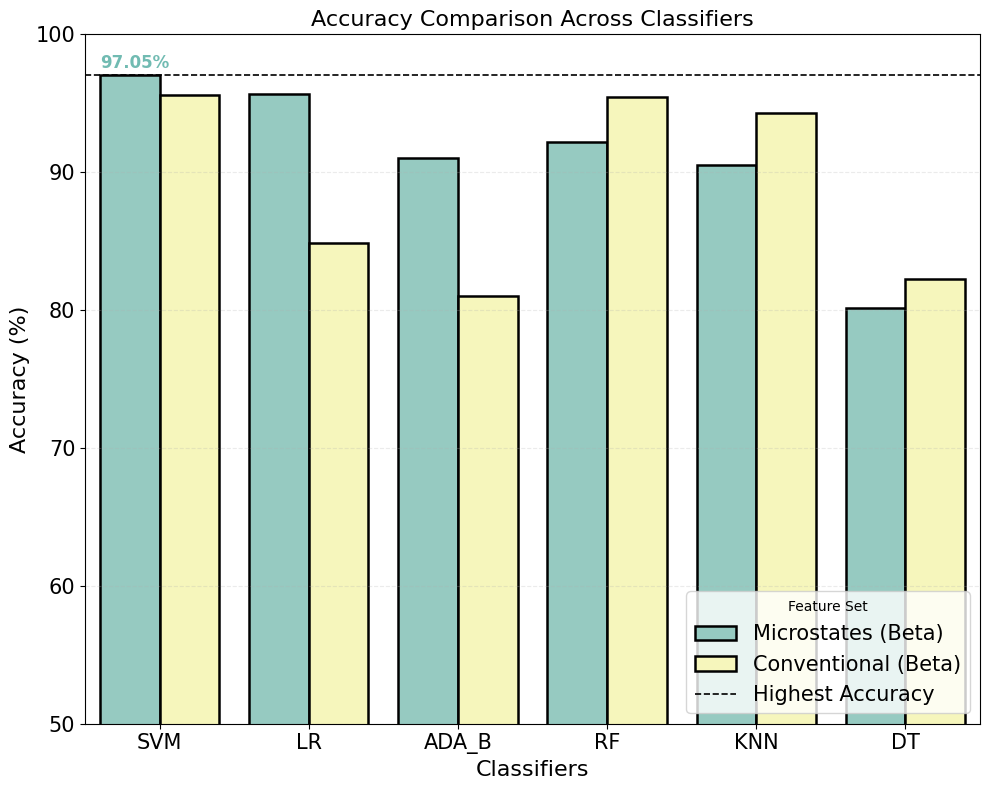

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(df)

# Create the plot
plt.figure(figsize=(10, 8))
bars = sns.barplot(x="Classifiers", y="Accuracy", hue="Feature Set", data=df, palette='Set3', edgecolor='black', linewidth=1.8)

# Find the highest accuracy
max_accuracy = df["Accuracy"].max()

# Add a horizontal line at the highest bar
plt.axhline(y=max_accuracy, color='black', linestyle='--', linewidth=1.2, label="Highest Accuracy")

# Annotate the highest accuracy value
plt.text(x=-0.4, y=max_accuracy + 0.5, s=f"{max_accuracy:.2f}%", color='#71BBB2', fontsize=12, fontweight='bold')

# Set font sizes and labels
plt.title("Accuracy Comparison Across Classifiers", fontsize=16)
plt.xlabel("Classifiers", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend(title="Feature Set", loc="lower right", fontsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.25)

# Set y-axis limits
plt.ylim(50, 100)

plt.tight_layout()

# Save the plot
plt.savefig("accuracy_comparison.png", dpi=300, bbox_inches='tight')

plt.show()


   Classifiers          Feature Set  Accuracy     F1    AUC
0          SVM   Microstates (Beta)     97.05  97.03  99.78
1          SVM  Conventional (Beta)     95.63  95.63  99.57
2           LR   Microstates (Beta)     95.68  95.63  99.37
3           LR  Conventional (Beta)     84.89  84.88  95.21
4        ADA_B   Microstates (Beta)     91.05  91.06  95.87
5        ADA_B  Conventional (Beta)     80.99  80.93  88.59
6           RF   Microstates (Beta)     92.22  92.17  98.60
7           RF  Conventional (Beta)     95.42  95.42  99.44
8          KNN   Microstates (Beta)     90.49  90.50  97.92
9          KNN  Conventional (Beta)     94.31  94.32  98.97
10          DT   Microstates (Beta)     80.12  79.99  89.81
11          DT  Conventional (Beta)     82.26  82.19  95.21


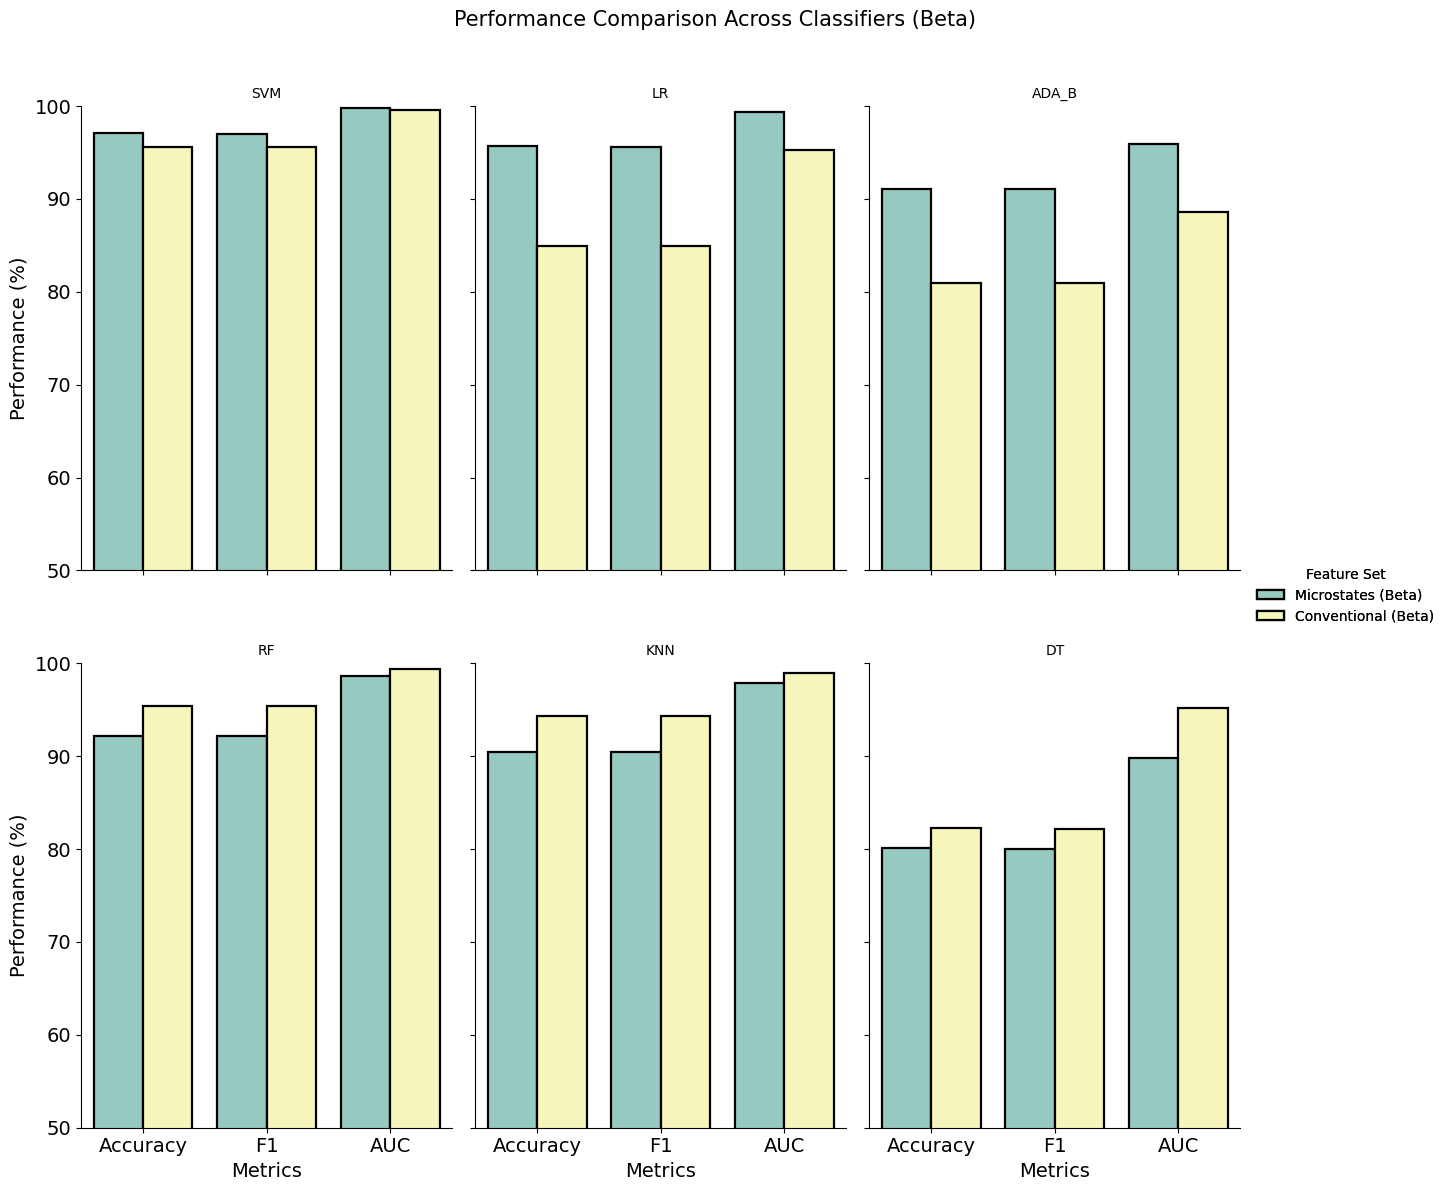

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(df)
# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=["Classifiers", "Feature Set"], 
                    value_vars=["Accuracy", "F1", "AUC"], 
                    var_name="Metric", 
                    value_name="Score")

# Create a grid of bar plots using seaborn
g = sns.catplot(
    data=df_melted, 
    x="Metric", 
    y="Score", 
    hue="Feature Set", 
    col="Classifiers",
    kind="bar", 
    palette='Set3',  # Improved color palette
    height=6, 
    aspect=0.6,
    col_wrap=3,  # Display plots in 3 rows and 2 columns
    edgecolor='black',
    linewidth= 1.6
)

# Adjust plot titles and axes using plt
g.set_titles("{col_name}", fontsize=15)
g.set_axis_labels("Metrics", "Performance (%)", fontsize=14)
g.set(ylim=(50, 100))
g.add_legend(title="Feature Set")
g.tick_params(axis='x', labelsize=14)  # Increase font size for x-axis ticks
g.tick_params(axis='y', labelsize=14)  # Increase font size for y-axis ticks

# Improve layout
plt.subplots_adjust(top=0.9, hspace=0.2)
g.fig.suptitle("Performance Comparison Across Classifiers (Beta)", fontsize=15)  # Add a common title

# Save the plot as an image file
plt.savefig("performance_comparison_across_classifiers.png", dpi=300, bbox_inches='tight')

plt.show()


In [14]:
import pandas as pd

data = {
    "Model": ["SVM", "RF", "KNN", "DT", "LR", "ADA_B"],
    "Delta_Accuracy(%)": [76.66, 71.63, 65.28, 59.84, 74.78, 71.33],
    "Delta_F1(macro avg)": [76.6, 71.61, 65.39, 59.11, 74.64, 71.23],
    "Delta_AUC(%)": [91.14, 88.36, 83.27, 76.17, 88.76, 84.87],
    "Theta_Accuracy(%)": [93.24, 87.49, 85.05, 73.06, 91.76, 88.05],
    "Theta_F1(macro avg)": [93.17, 87.4, 85.02, 73.01, 91.68, 87.97],
    "Theta_AUC(%)": [99.07, 96.79, 95.73, 81.08, 98.62, 93.93],
    "Alpha_Accuracy(%)": [94.66, 88.51, 88.56, 79.36, 93.95, 89.27],
    "Alpha_F1(macro avg)": [94.6, 88.46, 88.49, 79.24, 93.92, 89.3],
    "Alpha_AUC(%)": [99.3, 97.85, 97.45, 87.95, 98.67, 93.64],
    "Beta_Accuracy(%)": [97.05, 92.22, 90.49, 80.12, 95.68, 91.05],
    "Beta_F1(macro avg)": [97.03, 92.17, 90.5, 79.99, 95.63, 91.06],
    "Beta_AUC(%)": [99.78, 98.6, 97.92, 99.81, 99.37, 95.87],
    "Gamma_Accuracy(%)": [95.93, 90.85, 86.73, 79.26, 92.88, 88.71],
    "Gamma_F1(macro avg)": [95.89, 90.8, 86.79, 79.17, 92.82, 88.64],
    "Gamma_AUC(%)": [99.52, 98.03, 96.45, 88.8, 98.89, 93.81],
}

df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,Delta_Accuracy(%),Delta_F1(macro avg),Delta_AUC(%),Theta_Accuracy(%),Theta_F1(macro avg),Theta_AUC(%),Alpha_Accuracy(%),Alpha_F1(macro avg),Alpha_AUC(%),Beta_Accuracy(%),Beta_F1(macro avg),Beta_AUC(%),Gamma_Accuracy(%),Gamma_F1(macro avg),Gamma_AUC(%)
0,SVM,76.66,76.60,91.14,93.24,93.17,99.07,94.66,94.60,99.30,97.05,97.03,99.78,95.93,95.89,99.52
1,RF,71.63,71.61,88.36,87.49,87.40,96.79,88.51,88.46,97.85,92.22,92.17,98.60,90.85,90.80,98.03
2,KNN,65.28,65.39,83.27,85.05,85.02,95.73,88.56,88.49,97.45,90.49,90.50,97.92,86.73,86.79,96.45
3,DT,59.84,59.11,76.17,73.06,73.01,81.08,79.36,79.24,87.95,80.12,79.99,99.81,79.26,79.17,88.80
4,LR,74.78,74.64,88.76,91.76,91.68,98.62,93.95,93.92,98.67,95.68,95.63,99.37,92.88,92.82,98.89
5,ADA_B,71.33,71.23,84.87,88.05,87.97,93.93,89.27,89.30,93.64,91.05,91.06,95.87,88.71,88.64,93.81


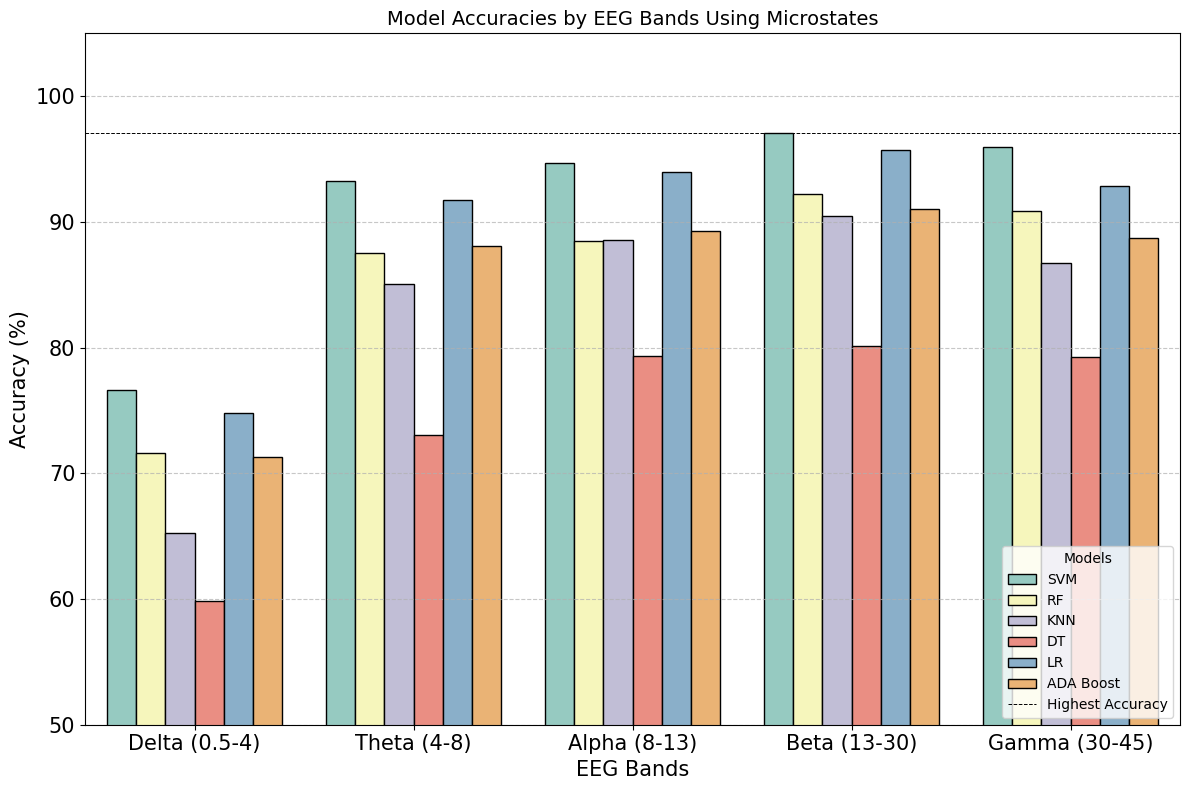

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
bands = ['Delta (0.5-4)', 'Theta (4-8)', 'Alpha (8-13)', 'Beta (13-30)', 'Gamma (30-45)']
models = ['SVM', 'RF', 'KNN', 'DT', 'LR', 'ADA Boost']
accuracies = [
    [76.66, 71.63, 65.28, 59.84, 74.78, 71.33],  # Delta
    [93.24, 87.49, 85.05, 73.06, 91.76, 88.05],  # Theta
    [94.66, 88.51, 88.56, 79.36, 93.95, 89.27],  # Alpha
    [97.05, 92.22, 90.49, 80.12, 95.68, 91.05],  # Beta
    [95.93, 90.85, 86.73, 79.26, 92.88, 88.71],  # Gamma
]

# Transform data into long-form DataFrame
data = []
for band, band_accuracies in zip(bands, accuracies):
    for model, accuracy in zip(models, band_accuracies):
        data.append({'Band': band, 'Model': model, 'Accuracy': accuracy})

df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Band', y='Accuracy', hue='Model', palette='Set3', edgecolor='black')

# Customization
plt.title("Model Accuracies by EEG Bands Using Microstates", fontsize=14)
plt.xlabel("EEG Bands", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.ylim(50, 105)  # Adjusted range to include all values
plt.axhline(max(df['Accuracy']), color='black', linestyle='--', linewidth=0.7, label='Highest Accuracy')
plt.legend(title="Models", loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.tight_layout()
plt.savefig("model_accuracies_eeg_band_seaborn.png", dpi=300, bbox_inches='tight')  # Save as a high-resolution image
plt.show()


In [16]:
import pandas as pd
import plotly.express as px

# Data
bands = ['Delta (0.5-4)', 'Theta (4-8)', 'Alpha (8-13)', 'Beta (13-30)', 'Gamma (30-45)']
models = ['SVM', 'RF', 'KNN', 'DT', 'LR', 'ADA Boost']
accuracies = [
    [76.66, 71.63, 65.28, 59.84, 74.78, 71.33],  # Delta
    [93.24, 87.49, 85.05, 73.06, 91.76, 88.05],  # Theta
    [94.66, 88.51, 88.56, 79.36, 93.95, 89.27],  # Alpha
    [97.05, 92.22, 90.49, 80.12, 95.68, 91.05],  # Beta
    [95.93, 90.85, 86.73, 79.26, 92.88, 88.71],  # Gamma
]

# Transform data into long-form DataFrame
data = []
for band, band_accuracies in zip(bands, accuracies):
    for model, accuracy in zip(models, band_accuracies):
        data.append({'Band': band, 'Model': model, 'Accuracy': accuracy})

df = pd.DataFrame(data)

# Create the Plotly bar plot
fig = px.bar(df, x="Band", y="Accuracy", color="Model", 
             barmode="group", 
             title="Model Accuracies by EEG Bands Using Microstates",
             labels={"Accuracy": "Accuracy (%)", "Band": "EEG Bands"},
             color_discrete_sequence=px.colors.qualitative.Set3)
# Customize bars: Increase width and add black border
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))


# Customize layout
fig.update_layout(
    title_font_size=20,
    xaxis=dict(
        title="EEG Bands",
        titlefont=dict(size=20),  # Increase X-axis title font size
        tickfont=dict(size=20)  # Increase X-axis values font size
    ),
    yaxis=dict(
        title="Accuracy (%)",
        titlefont=dict(size=20),  # Increase Y-axis title font size
        tickfont=dict(size=20),  # Increase Y-axis values font size
        range=[50, 100], # Set range from 50 to 100
        gridcolor="lightgray"
    ),
    legend_title_text="Models",
    legend=dict(
        x=0.69, y=0.,
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="black",
        borderwidth=1
    ),
    font=dict(size=18),
    # template="plotly_white",
    height=800,
    width=1100,
    # plot_bgcolor="white"
)

# Add a dummy trace for the legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],  # No actual data points
    mode="lines",
    line=dict(color="black", width=1.2, dash="dot"),
    name=f"Highest Accuracy: {max_value:.2f}%"
))

# Add a horizontal line for the highest accuracy
fig.add_hline(y=df['Accuracy'].max(), line_dash="dash", line_color="black", line_width= 0.8, annotation_text="Highest Accuracy")

# Show plot
fig.show()

fig.write_image("Model Accuracies by EEG Bands Using Microstates plotly.png", scale=4)


In [17]:
import plotly.figure_factory as ff
import pandas as pd
import numpy as np

# Data
bands = ['Delta (0.5-4)', 'Theta (4-8)', 'Alpha (8-13)', 'Beta (13-30)', 'Gamma (30-45)']
models = ['SVM', 'RF', 'KNN', 'DT', 'LR', 'ADA Boost']
accuracies = np.array([
    [76.66, 71.63, 65.28, 59.84, 74.78, 71.33],  # Delta
    [93.24, 87.49, 85.05, 73.06, 91.76, 88.05],  # Theta
    [94.66, 88.51, 88.56, 79.36, 93.95, 89.27],  # Alpha
    [97.05, 92.22, 90.49, 80.12, 95.68, 91.05],  # Beta
    [95.93, 90.85, 86.73, 79.26, 92.88, 88.71],  # Gamma
])

# Create the heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=accuracies,
    x=models,
    y=bands,
    colorscale='YlGnBu',
    showscale=True
)

# Customize layout
fig.update_layout(
    title="Model Accuracies Across EEG Bands (Microstates)",
    title_font_size=20,
    yaxis=dict(
        title="EEG Bands",
        titlefont=dict(size=20),  # Increase Y-axis title font size
        tickfont=dict(size=20),  # Increase Y-axis values font size
    ),
    xaxis=dict(
        # title="ML Models",
        titlefont=dict(size=20),  # Increase X-axis title font size
        tickfont=dict(size=20)  # Increase X-axis values font size
    ),
    font=dict(size=20),
    # template="plotly_white",
    height=800,
    width=1000,
    # plot_bgcolor="white"
)


# Show the figure
fig.show()

fig.write_image("Heatmap Model Accuracies Across EEG Bands Using Microstates.png", scale=4)

In [43]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Create dataframes for both analyses
microstate_times = {
    'Feature Set': ['Delta (0.5-4)', 'Theta (4-8)', 'Alpha (8-13)', 'Beta (13-30)', 'Gamma (30-45)'],
    'Execution Time': [351.96, 324.70, 335.24, 345.91, 352.72]
}

conventional_times = {
    'Feature Set': ['Delta (0.5-4)', 'Theta (4-8)', 'Alpha (8-13)', 'Beta (13-30)', 'Gamma (30-45)'],
    'Execution Time': [2306.62, 2680.97, 2659.69, 2527.57, 2299.14]
}

# Create figure
fig = go.Figure()

# Use colors from Set3
set3_colors = px.colors.qualitative.Set3[2:4]

# Add bars for Microstate analysis
fig.add_trace(go.Bar(
    name='Microstate',
    x=microstate_times['Feature Set'],
    y=microstate_times['Execution Time'],
    marker=dict(
        color=set3_colors[0],
        line=dict(color="black", width=1.5)
    ),
    text=[f"{round(y)}" for y in microstate_times['Execution Time']],  # Rounded values
    textposition="inside",
    textangle=0,  # Horizontal text
    insidetextfont=dict(size=20, weight='bold')  # Bold text
))

# Add bars for Conventional analysis
fig.add_trace(go.Bar(
    name='Conventional',
    x=conventional_times['Feature Set'],
    y=conventional_times['Execution Time'],
    marker=dict(
        color=set3_colors[1],
        line=dict(color="black", width=1.5)
    ),
    text=[f"{round(y)}" for y in conventional_times['Execution Time']],  # Rounded values
    textposition="inside",
    textangle=0,  # Horizontal text
    insidetextfont=dict(size=20, weight='bold')  # Bold text
))

# Update layout
fig.update_layout(
    barmode='group',
    title="Execution Time Comparison: Microstate vs Conventional",
    xaxis=dict(
        title="EEG Bands",
        titlefont=dict(size=22),
        tickfont=dict(size=22)
    ),
    yaxis=dict(
        title="Execution Time (seconds)",
        titlefont=dict(size=22),
        tickfont=dict(size=22)
    ),
    legend=dict(
        x=0.792,
        y=1,
        bgcolor="rgba(255, 255, 255, 0.9)",
        bordercolor="black",
        borderwidth=1,
        font=dict(size=24)
    ),
    font=dict(size=20),
    height=800,
    template="plotly_white",
    width=1000,
)

# Show the plot
fig.show()

# Save the plot as a high-resolution PNG
fig.write_image("Execution_Time_Comparison.png", scale=3)